# **Phenotype-Gene Embedding Analysis for Causal Gene Identification**

## **Introduction**
This notebook focuses on the analysis of phenotype-gene relationships using embeddings to identify causal genes. The embeddings represent high-dimensional vector representations of both phenotypes and genes, derived from prior biological data. The main objective is to determine if these embeddings hold any signal that distinguishes causal genes from non-causal ones for given phenotypes.

Genes are segments of DNA that serve as instructions for making proteins, which perform various functions in the body. They are the basic units of heredity and are passed down from parents to offspring.

A phenotype refers to the observable physical, biochemical, or behavioral characteristics of an organism, which are the result of the interaction between its genes and the environment.

Causal genes are specific genes that directly contribute to or influence the development of a particular phenotype, trait, or disease. 


To perform this analysis, several steps are followed:
1. Random sampling of 500 phenotypes using a hash value of the user's name as the seed.
2. Dimensionality reduction to visualize the embeddings and observe patterns.
3. Clustering techniques to assess relationships between phenotype and gene embeddings.
4. Exploratory analysis of gene causality through various vector analysis and distance-based approaches.

This notebook also ensures reproducibility by creating a unique dataset for each user based on the hash of their name.

---


## **Notebook Sections**


### **1. Data Preprocessing**
This section loads the phenotype and gene embedding datasets, handles missing values, and performs necessary preprocessing steps such as:
- Converting string embeddings into numerical lists.
- Hashing the user's name to create a consistent and unique dataset.
- Randomly sampling 500 phenotypes for analysis.


In [1]:
import pandas as pd

# Load phenotypes and associated genes
phenotype_gene_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.for_llm.tsv'
phenotype_gene_df = pd.read_csv(phenotype_gene_file, sep='\t')

# Load ground truth causal gene data
ground_truth_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.labels'
ground_truth_df = pd.read_csv(ground_truth_file, sep='\t')

# Load gene embeddings
gene_embeddings_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/gene_embeddings.csv'
gene_embeddings_df = pd.read_csv(gene_embeddings_file)

# Load phenotype embeddings
phenotype_embeddings_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/phenotype_embeddings.csv'
phenotype_embeddings_df = pd.read_csv(phenotype_embeddings_file)


In [2]:
phenotype_gene_df

,row_number,description,symbol_gene_string,ensembl_gene_string
0,1,Carotenoid and tocopherol levels (beta-caroten...,"{ATMIN},{BCO1},{C16orf46},{CDYL2},{CENPN},{CMC...","{ENSG00000103121},{ENSG00000135697},{ENSG00000..."
1,2,Bilirubin levels,"{ATG16L1},{DGKD},{HJURP},{MROH2A},{SAG},{SPP2}...","{ENSG00000072080},{ENSG00000077044},{ENSG00000..."
2,3,Bilirubin levels,"{ARHGAP4},{ATP6AP1},{AVPR2},{CTAG1A},{CTAG1B},...","{ENSG00000007350},{ENSG00000013563},{ENSG00000..."
3,4,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,"{ESR2},{GPHB5},{PPP2R5E},{RHOJ},{SGPP1},{SYNE2...","{ENSG00000054654},{ENSG00000126785},{ENSG00000..."
4,5,Fasting glucose-related traits (FPG) (D-Glucose),"{ABCB11},{CERS6},{DHRS9},{G6PC2},{LRP2},{NOSTR...","{ENSG00000073734},{ENSG00000073737},{ENSG00000..."
...,...,...,...,...
846,847,treatment with nicorandil (coronary artery dis...,"{CDKN2A},{CDKN2B},{DMRTA1},{MTAP}","{ENSG00000099810},{ENSG00000147883},{ENSG00000..."
847,848,non-toxic goitre (multinodular goiter),"{ANP32B},{CCDC180},{CORO2A},{FOXE1},{HEMGN},{N...","{ENSG00000095380},{ENSG00000095383},{ENSG00000..."
848,849,"arthrosis of hip (osteoarthritis, hip)","{ANGPTL2},{LMX1B},{MVB12B},{RALGPS1},{ZBTB34},...","{ENSG00000136828},{ENSG00000136859},{ENSG00000..."
849,850,"Blood clot in the leg, DVT (deep vein thrombosis)","{ABO},{ADAMTS13},{ADAMTSL2},{AK8},{CACFD1},{CE...","{ENSG00000123453},{ENSG00000123454},{ENSG00000..."


In [3]:
ground_truth_df

,symbol,gene
0,BCO1,ENSG00000135697
1,UGT1A8,ENSG00000242366
2,G6PD,ENSG00000160211
3,SGPP1,ENSG00000126821
4,G6PC2,ENSG00000152254
...,...,...
846,CDKN2B,ENSG00000147883
847,FOXE1,ENSG00000178919
848,LMX1B,ENSG00000136944
849,ABO,ENSG00000175164


In [4]:
gene_embeddings_df

,Unnamed: 0,0,gpt_description,embedding
0,0,ATMIN,"The ATMIN gene, also known as ATM interactor (...","[-0.01672099530696869, 0.025642508640885353, -..."
1,1,BCO1,"Gene BCO1, also known as beta-carotene oxygena...","[0.01961715891957283, -0.0013358700089156628, ..."
2,2,C16orf46,"Gene C16orf46, also known as Chromosome 16 Ope...","[-0.013213221915066242, 0.008565986528992653, ..."
3,3,CDYL2,"The gene CDYL2, also known as Chromodomain Y-l...","[-0.010155326686799526, 0.007696880027651787, ..."
4,4,CENPN,"The gene CENPN, also known as Centromere Prote...","[0.0019102469086647034, -0.01410931721329689, ..."
...,...,...,...,...
10978,186,BOLA2-SMG1P6,The gene BOLA2-SMG1P6 is a fusion gene that re...,"[0.025516435503959656, 0.024719441309571266, -..."
10979,187,SLX1B,The SLX1B gene is a member of the SLX1 family ...,"[0.021502379328012466, 0.04098100587725639, -0..."
10980,188,SULT1A4,The gene SULT1A4 encodes for the enzyme sulfot...,"[-0.028887486085295677, 0.015331678092479706, ..."
10981,189,OR9I1,Gene OR9I1 is a member of the olfactory recept...,"[-0.015196411870419979, 0.005497212056070566, ..."


In [5]:
phenotype_embeddings_df

,Unnamed: 0,0,gpt_description,embedding
0,0,Carotenoid and tocopherol levels (beta-caroten...,Carotenoids and tocopherols are important clas...,"[0.03543854132294655, -0.002083840314298868, -..."
1,1,Bilirubin levels,Bilirubin is a yellow pigment that is produced...,"[-0.002501995535567403, -0.03334518149495125, ..."
2,2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,Sphingolipids are a class of lipids that play ...,"[-0.003154945094138384, -0.016002262011170387,..."
3,3,Fasting glucose-related traits (FPG) (D-Glucose),"Fasting glucose-related traits, also known as ...","[-0.026761554181575775, 0.011279185302555561, ..."
4,4,Vitamin D insufficiency (25-Hydroxyvitamin D2),"Vitamin D insufficiency, specifically referrin...","[0.004818837624043226, 0.01093713752925396, -0..."
...,...,...,...,...
954,954,Platelet forward scatter,Platelet forward scatter is a measurement used...,"[-0.029527518898248672, -0.002429093699902296,..."
955,955,Platelet large cell ratio,The platelet large cell ratio is a measure of ...,"[-0.01740766316652298, -0.02192745730280876, -..."
956,956,Diverticular disease,Diverticular disease is a common condition cha...,"[0.010556966066360474, 0.013189040124416351, -..."
957,957,Metabolite levels (cysteine-glutathione disulf...,"Metabolite levels, specifically cysteine-gluta...","[-0.01695943996310234, -0.0002931176859419793,..."


In [6]:
phenotype_embeddings_df.iloc[1,3]

'[-0.002501995535567403, -0.03334518149495125, -0.002035639015957713, 0.0071461861953139305, -0.02426714263856411, -0.01609690859913826, -0.01162431575357914, -0.05079272389411926, 0.03170670568943024, -0.03885842487215996, -0.024112151935696602, -0.006991195492446423, -0.016318324953317642, 0.002182326978072524, 0.03013465367257595, 0.03028964437544346, -0.02769908308982849, -0.018211428076028824, 0.032105252146720886, 0.05579671636223793, 0.01058919820934534, -0.029315417632460594, -0.03066605143249035, 0.0123881995677948, -0.024045726284384727, 0.0024812377523630857, 0.015333025716245174, 0.02732267789542675, -0.034186556935310364, -0.038570586591959, 0.016174403950572014, 0.015443733893334866, 0.0196838416159153, -0.060225024819374084, -0.04215751960873604, -0.014735204167664051, 0.033013056963682175, -0.024997813627123833, 0.04317602887749672, -0.021433023735880852, -0.020635927096009254, 0.0009811476338654757, -0.05641667917370796, 0.01091025024652481, 0.01430344395339489, 0.0042

### **2. Random Sampling of Phenotypes**
We generate a unique subset of 500 phenotypes using a hash of the user's name as the seed. This subset ensures consistent and reproducible results across multiple runs by the same user.


In [7]:
import random
import hashlib
import pandas as pd

# Now that we have loaded the datasets:
# phenotype_gene_df, ground_truth_df, gene_embeddings_df, phenotype_embeddings_df

# Step 1: Hash your name
def hash_name(name):
    normalized_name = name.replace(" ", "").lower()  # Normalize the name
    hash_object = hashlib.sha256(normalized_name.encode())  # Create a hash object
    return int(hash_object.hexdigest(), 16) % (2**32)  # Return a large integer as hash

# Step 2: Use the hash as a seed for sampling and save the hash value in a variable
def set_seed(name):
    hash_value = hash_name(name)  # Hash the name
    random.seed(hash_value)  # Set the seed for reproducibility
    return hash_value  # Return the hash value for later use

# Step 3: Sample 500 phenotypes based on the seed
def sample_phenotypes(df, name, num_samples=500):
    seed_value = set_seed(name)  # Use the hash value as the seed
    sampled_df = df.sample(n=num_samples, random_state=seed_value)  # Sample phenotypes
    return sampled_df, seed_value  # Return the sampled dataframe and the seed value

# Define your name
name = "SAPEKSHTOMAR"  # Replace with your actual name

# Sample 500 phenotypes from the dataframe
sampled_phenotypes, hash_value = sample_phenotypes(phenotype_gene_df, name)

# Save the sampled phenotypes to a CSV file
sampled_phenotypes.to_csv("sampled_phenotypes.csv", index=False)

# Print or store the hash value for future reference
print(f"The hash value for the name '{name}' is: {hash_value}")



The hash value for the name 'SAPEKSHTOMAR' is: 3207838780


## Random Sampling of 500 Phenotypes with Name-Based Hash Seed

### Introduction
This script demonstrates how to hash a name and use it as a seed to consistently sample a unique subset of 500 phenotypes from a larger dataset. This ensures that every individual working on the dataset will have a unique, reproducible subset based on their name.

### Steps
The script follows the following key steps:
1. **Hash the user's name** to generate a unique numeric seed.
2. **Set the seed** using the hash to ensure reproducibility.
3. **Randomly sample 500 phenotypes** from the dataset using the hash-based seed.
4. **Save the sampled data** as a CSV file for further analysis.


In [9]:
import pandas as pd
import random
import hashlib
import csv  # Import the built-in csv module

# Step 1: Hash your name
def hash_name(name):
    normalized_name = name.replace(" ", "").lower()  # Normalize the name
    hash_object = hashlib.sha256(normalized_name.encode())  # Create a hash object
    return int(hash_object.hexdigest(), 16) % (2**32)  # Return a large integer as hash

# Step 2: Use the hash as a seed for sampling and return the hash value
def set_seed(name):
    hash_value = hash_name(name)  # Hash the name
    random.seed(hash_value)  # Set the seed for reproducibility
    return hash_value  # Return the hash value for later use

# Load phenotype dataset (replace with actual file path)
phenotype_file_path = "/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.for_llm.tsv"
phenotype_df = pd.read_csv(phenotype_file_path, sep='\t')

# Ensure correct column names in phenotype_df
phenotype_df.columns = ['row_number', 'description', 'symbol_gene_string', 'ensembl_gene_string']

# Sample 500 phenotypes based on the seed and save the hash value
def sample_phenotypes(df, name, num_samples=500):
    seed_value = set_seed(name)  # Use the hash value as the seed
    sampled_df = df.sample(n=num_samples, random_state=seed_value)  # Sample phenotypes using the seed value
    return sampled_df, seed_value  # Return both the sampled dataframe and the seed value

# Define the name
name = "SAPEKSHTOMAR"

# Call the sampling function and capture both the sampled phenotypes and the hash value
sampled_phenotypes_gene, hash_value = sample_phenotypes(phenotype_df, name)

# Load phenotype embeddings dataset (replace with actual file path)
embeddings_file_path = "/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/phenotype_embeddings.csv"  # Update with the correct file path
phenotype_embeddings_df_error = pd.read_csv(embeddings_file_path)

# Ensure correct column names in phenotype_embeddings_df
phenotype_embeddings_df_error.columns = ['Unnamed: 0', 'row_number', 'gpt_description', 'embedding']

# Sampled phenotypes from the phenotype embeddings DataFrame
sampled_phenotypes_embeddings, hash_value_embeddings = sample_phenotypes(phenotype_embeddings_df_error, name)

# Clean up the DataFrame for better CSV output
sampled_phenotypes_embeddings = sampled_phenotypes_embeddings.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Save the sampled phenotypes embeddings to a CSV file with better formatting
sampled_phenotypes_embeddings.to_csv("sampled_phenotypes_embeddings.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)  # Use the csv module

# Save the sampled phenotypes to a CSV file
sampled_phenotypes_gene.to_csv("sampled_phenotypes.csv", index=False)

# Save the hash value in a variable for future use or display it
print(f"The hash value for the name '{name}' is: {hash_value}")
print(f"The hash value for the embeddings is: {hash_value_embeddings}")


/tmp/ipykernel_39991/3026822329.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sampled_phenotypes_embeddings = sampled_phenotypes_embeddings.applymap(lambda x: x.strip() if isinstance(x, str) else x)


The hash value for the name 'SAPEKSHTOMAR' is: 3207838780
The hash value for the embeddings is: 3207838780


In [10]:
sampled_phenotypes_embeddings

,Unnamed: 0,row_number,gpt_description,embedding
617,617,Sialorrhea,"Sialorrhea, also known as drooling or hypersal...","[-0.010977225378155708, 0.003763150656595826, ..."
319,319,metabolite: vitamin D (vitamin D measurement),Vitamin D is a crucial nutrient that plays a s...,"[0.015257763676345348, -0.003238328732550144, ..."
789,789,Diastolic blood pressure,Diastolic blood pressure is one of the two com...,"[0.03145553916692734, -0.017230724915862083, -..."
798,798,Glucose,The phenotype of an organism refers to its obs...,"[-0.018757665529847145, 0.007759550586342812, ..."
688,688,"Tachycardia, Ventricular",Tachycardia is a condition characterized by a ...,"[-0.013566704466938972, 0.01442769169807434, -..."
...,...,...,...,...
107,107,Blood metabolite ratios (X-11440/4-androsten-3...,"Blood metabolite ratios, such as X-11440/4-and...","[-0.008213652297854424, 0.007388761732727289, ..."
916,916,Metabolite levels (cerotoylcarnitine (C26); C2...,"Metabolite levels, such as cerotoylcarnitine (...","[-0.013030719943344593, -0.0037634633481502533..."
668,668,"Leukemia, Myelogenous, Chronic, BCR-ABL Positive",Chronic myelogenous leukemia (CML) is a type o...,"[0.010272667743265629, -0.0032607237808406353,..."
62,62,Blood metabolite levels (X-11445--5-alpha-preg...,"Blood metabolite levels, such as X-11445--5-al...","[0.001508861780166626, 0.002970379777252674, -..."


### **3. Dimensionality Reduction**
Using dimensionality reduction techniques like PCA and t-SNE, the high-dimensional embedding vectors are reduced to a lower-dimensional space. This allows for better visualization and helps in identifying patterns in the data that might indicate causal relationships between genes and phenotypes.


In [11]:
!pip install matplotlib
!pip install scikit-learn

/home/its_relative/venvs/py312/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/its_relative/venvs/py312/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


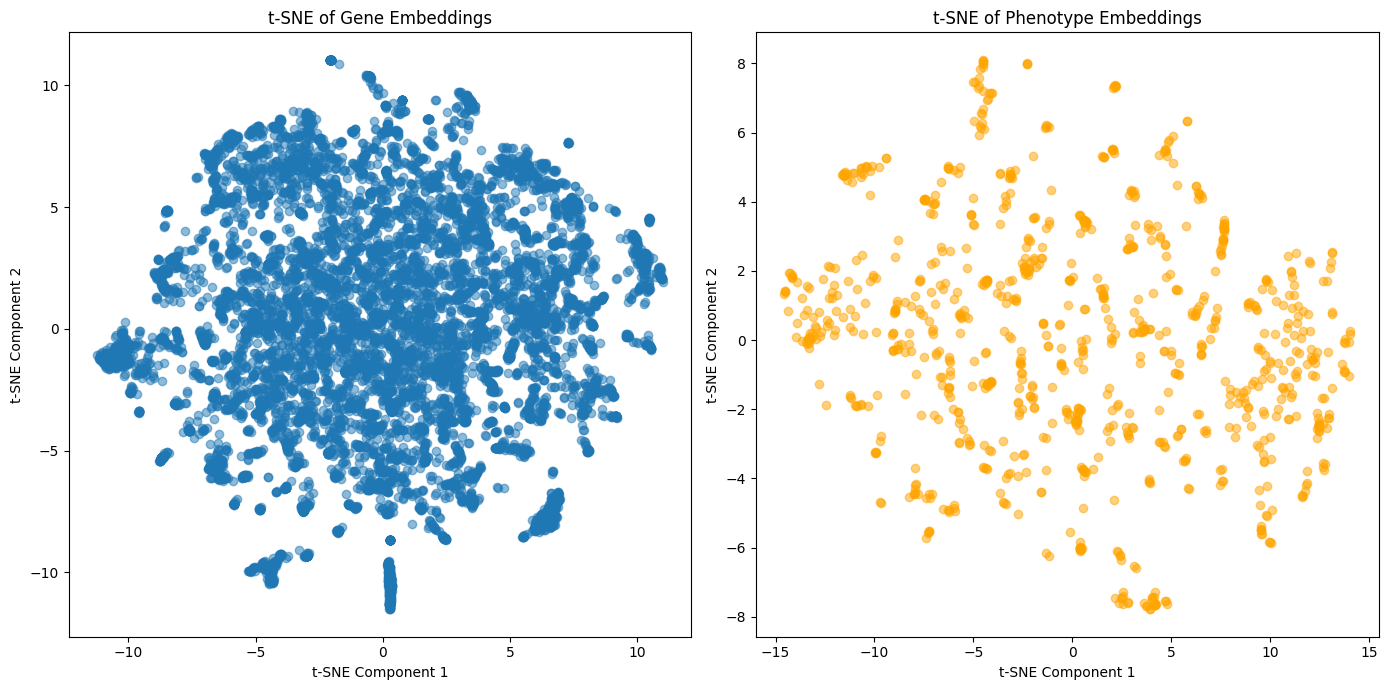

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# # Load phenotypes and associated genes
# phenotype_gene_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.for_llm.tsv'
# phenotype_gene_df = pd.read_csv(phenotype_gene_file, sep='\t')

# # Load ground truth causal gene data
# ground_truth_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.labels'
# ground_truth_df = pd.read_csv(ground_truth_file, sep='\t')

# # Load gene embeddings
# gene_embeddings_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/gene_embeddings.csv'
# gene_embeddings_df = pd.read_csv(gene_embeddings_file)

# # Load phenotype embeddings
# phenotype_embeddings_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/phenotype_embeddings.csv'
# phenotype_embeddings_df = pd.read_csv(phenotype_embeddings_file)

# Step 1: Convert embeddings from string representation to numpy arrays
# Removing unnecessary columns and converting the 'embedding' column to lists
gene_embeddings_df['embedding'] = gene_embeddings_df['embedding'].apply(eval)  # Use eval to convert string representation of list to list
phenotype_embeddings_df['embedding'] = phenotype_embeddings_df['embedding'].apply(eval)  # Same for phenotype embeddings

# Convert embeddings to numpy arrays
gene_embeddings = np.array(gene_embeddings_df['embedding'].tolist())  # Convert lists of embeddings to numpy array
phenotype_embeddings = np.array(phenotype_embeddings_df['embedding'].tolist())  # Convert lists of embeddings to numpy array

# Step 2: Dimensionality Reduction with PCA
pca_gene = PCA(n_components=50)  # Reduce to 50 components first
gene_embeddings_pca = pca_gene.fit_transform(gene_embeddings)

pca_phenotype = PCA(n_components=50)  # Reduce to 50 components first
phenotype_embeddings_pca = pca_phenotype.fit_transform(phenotype_embeddings)

# Step 3: Further Dimensionality Reduction with t-SNE
tsne_gene = TSNE(n_components=2, perplexity=30, n_iter=300)
gene_embeddings_tsne = tsne_gene.fit_transform(gene_embeddings_pca)

tsne_phenotype = TSNE(n_components=2, perplexity=30, n_iter=300)
phenotype_embeddings_tsne = tsne_phenotype.fit_transform(phenotype_embeddings_pca)

# Step 4: Visualization of t-SNE Results
plt.figure(figsize=(14, 7))

# Plot Gene Embeddings
plt.subplot(1, 2, 1)
plt.scatter(gene_embeddings_tsne[:, 0], gene_embeddings_tsne[:, 1], alpha=0.5)
plt.title('t-SNE of Gene Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Plot Phenotype Embeddings
plt.subplot(1, 2, 2)
plt.scatter(phenotype_embeddings_tsne[:, 0], phenotype_embeddings_tsne[:, 1], alpha=0.5, color='orange')
plt.title('t-SNE of Phenotype Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


### Key Findings from t-SNE Graphs

#### 1. **Gene Embeddings (Left Plot)**:
   - The t-SNE projection of the gene embeddings shows a dense, uniform distribution of data points with no obvious separations.
   - This suggests that the gene embeddings are highly complex, with possible overlaps in the data points, indicating that further analysis may be required to distinguish meaningful patterns related to causal gene identification.
   - No clear clusters are visible, which could indicate that gene embeddings alone may not be sufficient to easily distinguish between causal and non-causal genes.

#### 2. **Phenotype Embeddings (Right Plot)**:
   - The phenotype embeddings, in contrast, are more spread out with visible gaps and groupings.
   - This distribution could suggest the presence of more defined structure or relationships between phenotypes, which may reflect biological groupings or classifications.
   - The clusters and separation in the plot could be explored further to understand if certain phenotypes are more closely associated with specific causal genes.

#### 3. **Comparison Between Gene and Phenotype Embeddings**:
   - The gene embeddings show much more overlap, while phenotype embeddings have clearer separations. This could mean that phenotype embeddings provide more immediate insights into the relationships within the data.
   - Further investigation, such as coloring by causal vs. non-causal genes or phenotypes, may reveal additional insights and help with the identification of causal relationships.

#### 4. **Dimensionality Reduction Insights**:
   - t-SNE is effective in showing local relationships in the data, but additional techniques, such as clustering or classification models, may be needed to further distinguish causal genes.
   - The current visualization provides a good starting point for understanding the embeddings, but additional labeling or ground-truth data is needed to confirm patterns of causality.



### **4. Clustering Analysis**
Different unsupervised learning algorithms such as K-Means and DBSCAN are employed to cluster the embeddings of phenotypes and genes. The clusters are analyzed to see if causal genes can be distinguished from non-causal genes based on their embeddings.


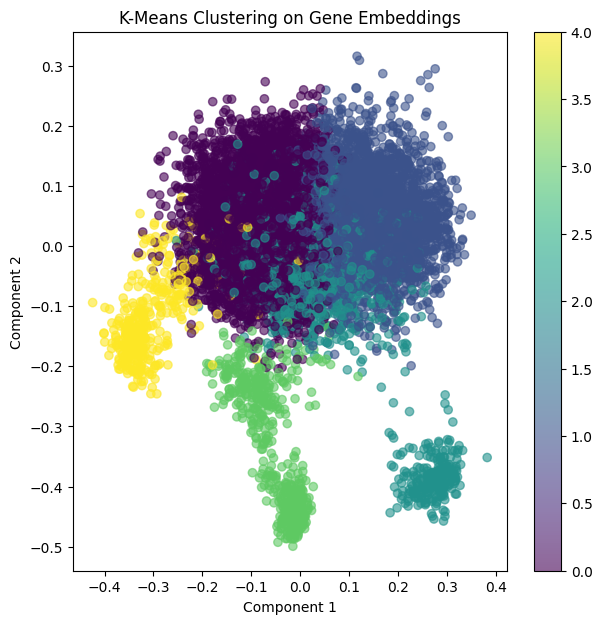

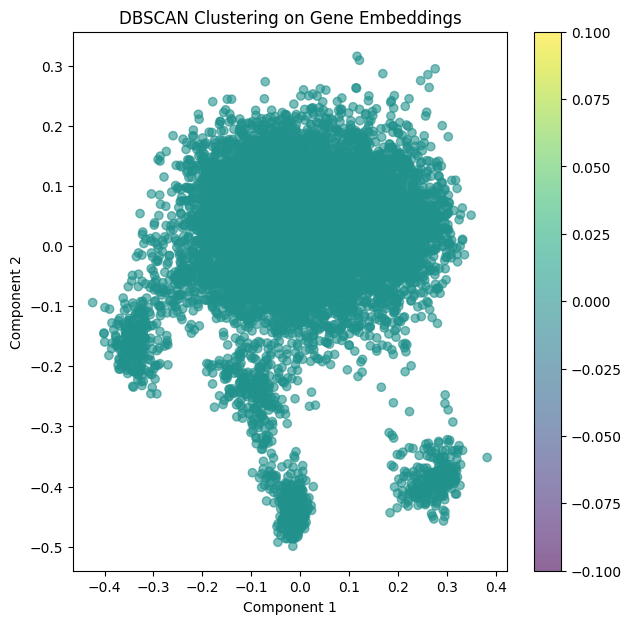

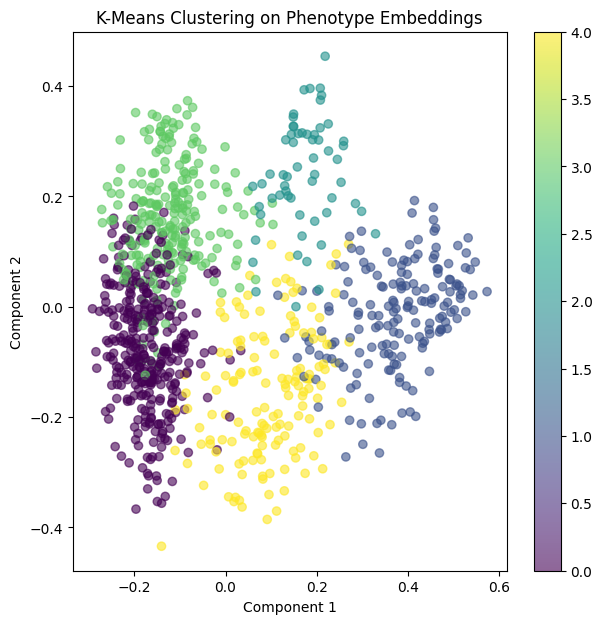

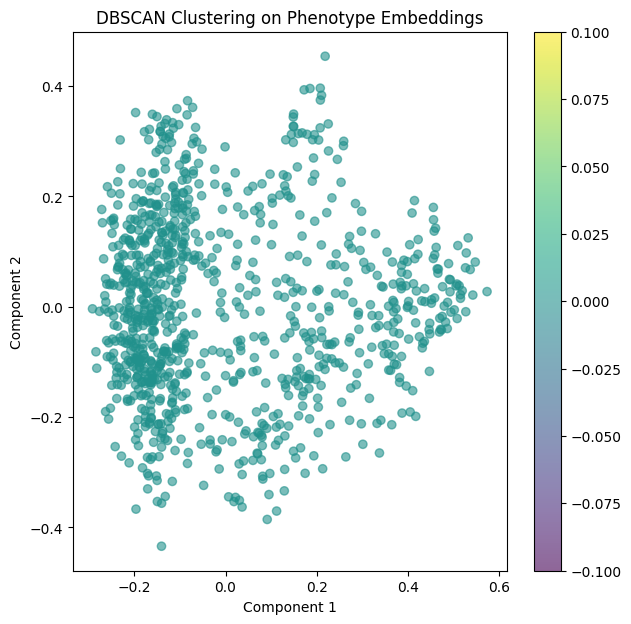

Silhouette Score for K-Means on Gene Embeddings: 0.058571513173698235
Silhouette Score for K-Means on Phenotype Embeddings: 0.07872820145576373


In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Reduced dimensions using PCA
# Reusing gene_embeddings_pca and phenotype_embeddings_pca from your previous code

# Step 1: K-Means Clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans

# Step 2: DBSCAN Clustering
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    return clusters, dbscan

# Step 3: Visualize Clustering Results
def visualize_clusters(data, clusters, title):
    plt.figure(figsize=(7, 7))
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.show()

# Step 4: Perform Clustering and Visualization on Gene Embeddings
# K-Means
kmeans_gene_clusters, kmeans_gene = kmeans_clustering(gene_embeddings_pca, n_clusters=5)
visualize_clusters(gene_embeddings_pca, kmeans_gene_clusters, 'K-Means Clustering on Gene Embeddings')

# DBSCAN
dbscan_gene_clusters, dbscan_gene = dbscan_clustering(gene_embeddings_pca, eps=2.0, min_samples=5)
visualize_clusters(gene_embeddings_pca, dbscan_gene_clusters, 'DBSCAN Clustering on Gene Embeddings')

# Step 5: Perform Clustering and Visualization on Phenotype Embeddings
# K-Means
kmeans_phenotype_clusters, kmeans_phenotype = kmeans_clustering(phenotype_embeddings_pca, n_clusters=5)
visualize_clusters(phenotype_embeddings_pca, kmeans_phenotype_clusters, 'K-Means Clustering on Phenotype Embeddings')

# DBSCAN
dbscan_phenotype_clusters, dbscan_phenotype = dbscan_clustering(phenotype_embeddings_pca, eps=2.0, min_samples=5)
visualize_clusters(phenotype_embeddings_pca, dbscan_phenotype_clusters, 'DBSCAN Clustering on Phenotype Embeddings')

# Step 6: Evaluate Clustering (Optional but recommended)
# Silhouette Score to evaluate K-Means clustering
kmeans_gene_silhouette = silhouette_score(gene_embeddings_pca, kmeans_gene_clusters)
kmeans_phenotype_silhouette = silhouette_score(phenotype_embeddings_pca, kmeans_phenotype_clusters)
print(f'Silhouette Score for K-Means on Gene Embeddings: {kmeans_gene_silhouette}')
print(f'Silhouette Score for K-Means on Phenotype Embeddings: {kmeans_phenotype_silhouette}')


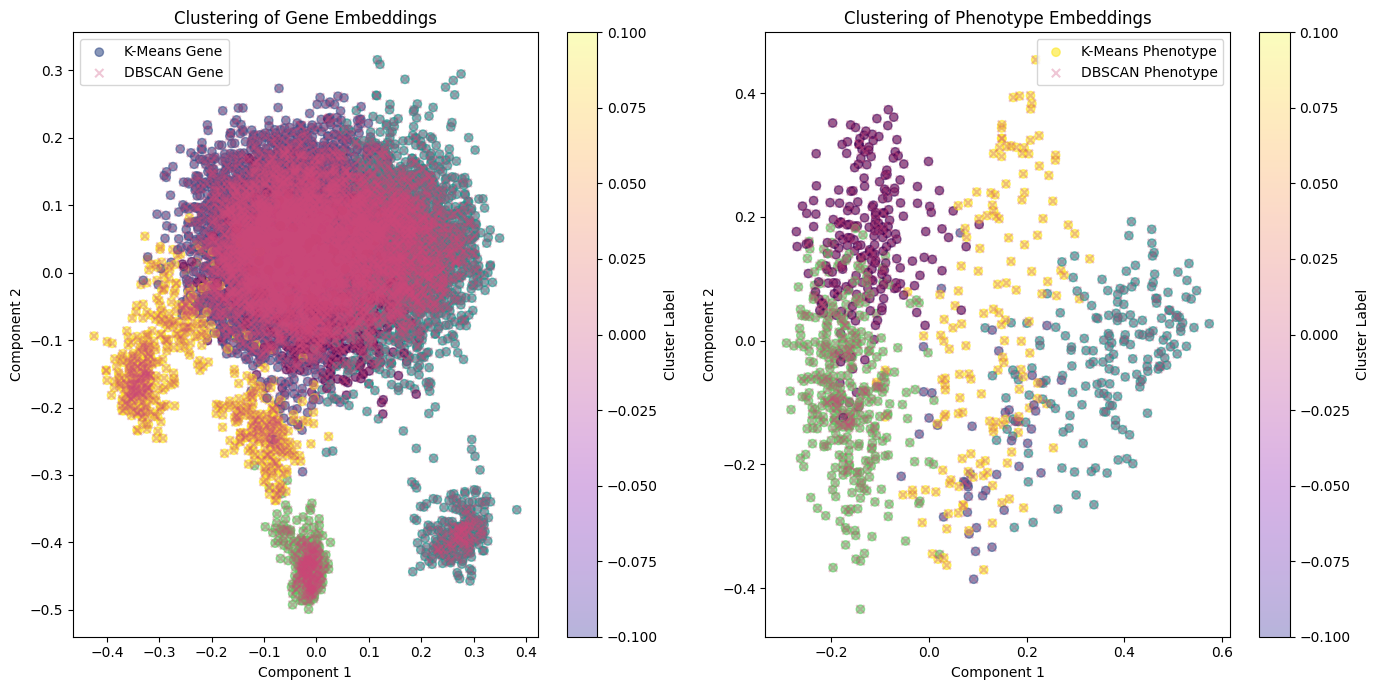

Silhouette Score for K-Means on Gene Embeddings: 0.059485577234307654
Silhouette Score for K-Means on Phenotype Embeddings: 0.07916027975149312


In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# phenotype_gene_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.for_llm.tsv'
# phenotype_gene_df = pd.read_csv(phenotype_gene_file, sep='\t')

# # Load ground truth causal gene data
# ground_truth_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.labels'
# ground_truth_df = pd.read_csv(ground_truth_file, sep='\t')

# # Load gene embeddings
# gene_embeddings_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/gene_embeddings.csv'
# gene_embeddings_df = pd.read_csv(gene_embeddings_file)

# # Load phenotype embeddings
# phenotype_embeddings_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/phenotype_embeddings.csv'
# phenotype_embeddings_df = pd.read_csv(phenotype_embeddings_file)

# Assuming you have already performed PCA and obtained gene_embeddings_pca and phenotype_embeddings_pca
# Step 1: Convert embeddings from string representation to numpy arrays
# gene_embeddings_df['embedding'] = gene_embeddings_df['embedding'].apply(eval)  # Use eval to convert string representation of list to list
# phenotype_embeddings_df['embedding'] = phenotype_embeddings_df['embedding'].apply(eval)  # Same for phenotype embeddings

# # Convert embeddings to numpy arrays
# gene_embeddings = np.array(gene_embeddings_df['embedding'].tolist())
# phenotype_embeddings = np.array(phenotype_embeddings_df['embedding'].tolist())

# Step 2: Dimensionality Reduction with PCA
pca_gene = PCA(n_components=50)
gene_embeddings_pca = pca_gene.fit_transform(gene_embeddings)

pca_phenotype = PCA(n_components=50)
phenotype_embeddings_pca = pca_phenotype.fit_transform(phenotype_embeddings)

# Step 3: K-Means Clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters

# Step 4: DBSCAN Clustering
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    return clusters

# Step 5: Perform Clustering on Gene and Phenotype Embeddings
kmeans_gene_clusters = kmeans_clustering(gene_embeddings_pca, n_clusters=5)
dbscan_gene_clusters = dbscan_clustering(gene_embeddings_pca, eps=2.0, min_samples=5)

kmeans_phenotype_clusters = kmeans_clustering(phenotype_embeddings_pca, n_clusters=5)
dbscan_phenotype_clusters = dbscan_clustering(phenotype_embeddings_pca, eps=2.0, min_samples=5)

# Step 6: Visualize Clustering Results in a Single Plot
plt.figure(figsize=(14, 7))

# Plot Gene Embeddings with K-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(gene_embeddings_pca[:, 0], gene_embeddings_pca[:, 1], c=kmeans_gene_clusters, cmap='viridis', alpha=0.6, label='K-Means Gene')
plt.scatter(gene_embeddings_pca[:, 0], gene_embeddings_pca[:, 1], c=dbscan_gene_clusters, cmap='plasma', alpha=0.3, marker='x', label='DBSCAN Gene')
plt.title('Clustering of Gene Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()

# Plot Phenotype Embeddings with K-Means Clusters
plt.subplot(1, 2, 2)
plt.scatter(phenotype_embeddings_pca[:, 0], phenotype_embeddings_pca[:, 1], c=kmeans_phenotype_clusters, cmap='viridis', alpha=0.6, label='K-Means Phenotype')
plt.scatter(phenotype_embeddings_pca[:, 0], phenotype_embeddings_pca[:, 1], c=dbscan_phenotype_clusters, cmap='plasma', alpha=0.3, marker='x', label='DBSCAN Phenotype')
plt.title('Clustering of Phenotype Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Evaluate Clustering (Optional but recommended)
kmeans_gene_silhouette = silhouette_score(gene_embeddings_pca, kmeans_gene_clusters)
kmeans_phenotype_silhouette = silhouette_score(phenotype_embeddings_pca, kmeans_phenotype_clusters)
print(f'Silhouette Score for K-Means on Gene Embeddings: {kmeans_gene_silhouette}')
print(f'Silhouette Score for K-Means on Phenotype Embeddings: {kmeans_phenotype_silhouette}')


### 1. Results

#### 1.1 Gene Embeddings Clustering
- **K-Means**: Forms well-defined, densely packed clusters with significant overlap in some regions.
- **DBSCAN**: Handles noise and detects more irregularly shaped clusters, particularly on the fringes of the embedding space.
- There are distinct regions at the bottom left and bottom right, indicating potential **outliers or specific gene groups**.

#### 1.2 Phenotype Embeddings Clustering
- **K-Means**: Forms better-separated clusters compared to the gene embeddings, suggesting stronger differentiation between phenotypes.
- **DBSCAN**: Also identifies noise and scattered points, reinforcing the observation of variability in phenotypes.
### 2. Conclusion
The clustering results of gene and phenotype embeddings demonstrate that both algorithms capture meaningful structures within the datasets. This clustering can aid in the identification of **causal genes** by isolating gene groups and their relationships to specific phenotypes.


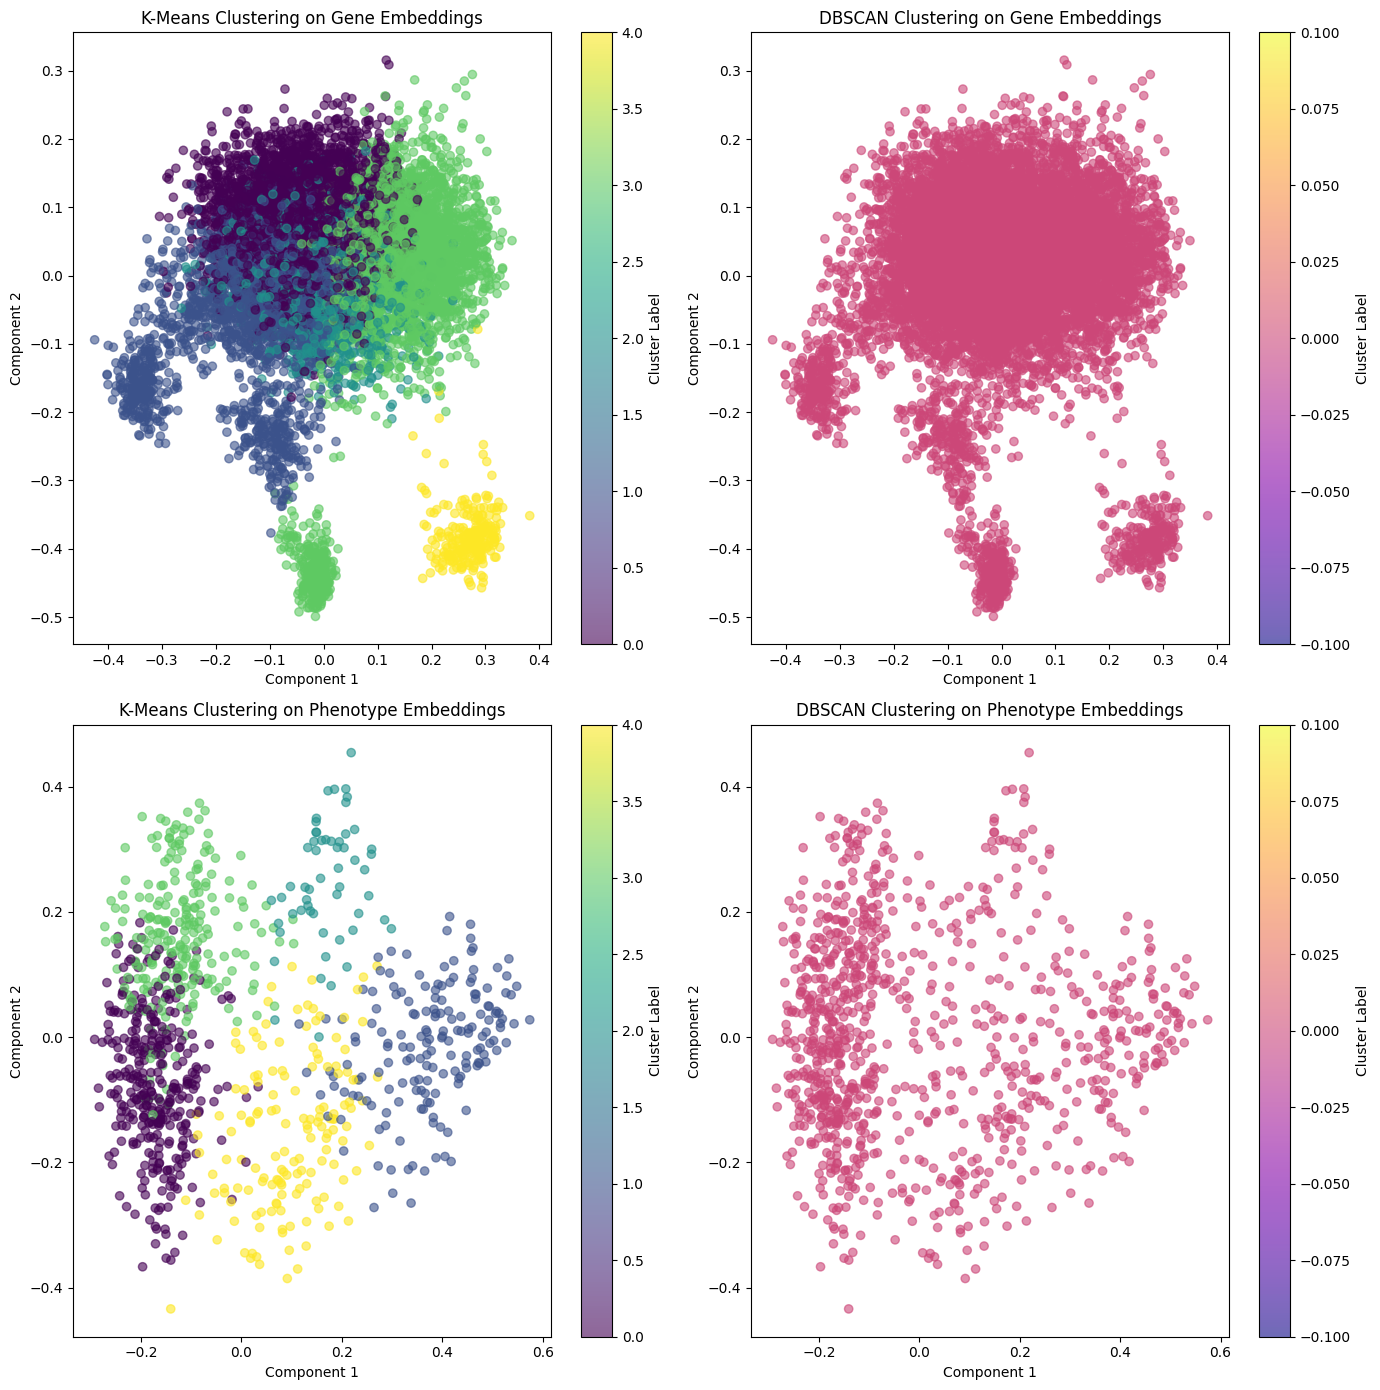

Silhouette Score for K-Means on Gene Embeddings: 0.05144473530737247
Silhouette Score for K-Means on Phenotype Embeddings: 0.07897957464971317


In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# # Load phenotypes and associated genes
# phenotype_gene_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.for_llm.tsv'
# phenotype_gene_df = pd.read_csv(phenotype_gene_file, sep='\t')

# # Load ground truth causal gene data
# ground_truth_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.labels'
# ground_truth_df = pd.read_csv(ground_truth_file, sep='\t')

# # Load gene embeddings
# gene_embeddings_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/gene_embeddings.csv'
# gene_embeddings_df = pd.read_csv(gene_embeddings_file)

# # Load phenotype embeddings
# phenotype_embeddings_file = '/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/phenotype_embeddings.csv'
# phenotype_embeddings_df = pd.read_csv(phenotype_embeddings_file)

# # Step 1: Convert embeddings from string representation to numpy arrays
# gene_embeddings_df['embedding'] = gene_embeddings_df['embedding'].apply(eval)  # Use eval to convert string representation of list to list
# phenotype_embeddings_df['embedding'] = phenotype_embeddings_df['embedding'].apply(eval)  # Same for phenotype embeddings

# # Convert embeddings to numpy arrays
# gene_embeddings = np.array(gene_embeddings_df['embedding'].tolist())
# phenotype_embeddings = np.array(phenotype_embeddings_df['embedding'].tolist())

# Step 2: Dimensionality Reduction with PCA
pca_gene = PCA(n_components=50)
gene_embeddings_pca = pca_gene.fit_transform(gene_embeddings)

pca_phenotype = PCA(n_components=50)
phenotype_embeddings_pca = pca_phenotype.fit_transform(phenotype_embeddings)

# Step 3: K-Means Clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters

# Step 4: DBSCAN Clustering
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    return clusters

# Step 5: Perform Clustering on Gene and Phenotype Embeddings
kmeans_gene_clusters = kmeans_clustering(gene_embeddings_pca, n_clusters=5)
dbscan_gene_clusters = dbscan_clustering(gene_embeddings_pca, eps=2.0, min_samples=5)

kmeans_phenotype_clusters = kmeans_clustering(phenotype_embeddings_pca, n_clusters=5)
dbscan_phenotype_clusters = dbscan_clustering(phenotype_embeddings_pca, eps=2.0, min_samples=5)

# Step 6: Visualize Clustering Results in a Single Plot with 4 Subplots
plt.figure(figsize=(14, 14))

# Plot Gene Embeddings with K-Means Clusters
plt.subplot(2, 2, 1)
plt.scatter(gene_embeddings_pca[:, 0], gene_embeddings_pca[:, 1], c=kmeans_gene_clusters, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering on Gene Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')

# Plot Gene Embeddings with DBSCAN Clusters
plt.subplot(2, 2, 2)
plt.scatter(gene_embeddings_pca[:, 0], gene_embeddings_pca[:, 1], c=dbscan_gene_clusters, cmap='plasma', alpha=0.6)
plt.title('DBSCAN Clustering on Gene Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')

# Plot Phenotype Embeddings with K-Means Clusters
plt.subplot(2, 2, 3)
plt.scatter(phenotype_embeddings_pca[:, 0], phenotype_embeddings_pca[:, 1], c=kmeans_phenotype_clusters, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering on Phenotype Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')

# Plot Phenotype Embeddings with DBSCAN Clusters
plt.subplot(2, 2, 4)
plt.scatter(phenotype_embeddings_pca[:, 0], phenotype_embeddings_pca[:, 1], c=dbscan_phenotype_clusters, cmap='plasma', alpha=0.6)
plt.title('DBSCAN Clustering on Phenotype Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

# Step 7: Evaluate Clustering (Optional but recommended)
kmeans_gene_silhouette = silhouette_score(gene_embeddings_pca, kmeans_gene_clusters)
kmeans_phenotype_silhouette = silhouette_score(phenotype_embeddings_pca, kmeans_phenotype_clusters)
print(f'Silhouette Score for K-Means on Gene Embeddings: {kmeans_gene_silhouette}')
print(f'Silhouette Score for K-Means on Phenotype Embeddings: {kmeans_phenotype_silhouette}')


### **Key Insights from Clustering Analysis**

1. **K-Means Clustering on Gene Embeddings**:
   - The K-Means algorithm successfully identified **five distinct clusters** in the gene embeddings.
   - Certain clusters, such as the dark purple one, are tightly packed, while others, like the yellow cluster, are more dispersed.
   - These results suggest that the genes' embedding space captures some internal structure, which might reflect biological characteristics. However, further validation is needed to assess whether these clusters separate causal and non-causal genes effectively.

2. **DBSCAN Clustering on Gene Embeddings**:
   - DBSCAN identified **one large dense cluster** and some outliers.
   - The presence of a single dominant cluster implies that many genes share similar characteristics in the embedding space. The outliers could represent genes with unique features.
   - Unlike K-Means, DBSCAN appears less sensitive to finer distinctions, but the outliers might warrant further investigation as potential causal gene candidates.

3. **K-Means Clustering on Phenotype Embeddings**:
   - K-Means found **five well-separated clusters** for the phenotype embeddings.
   - These clusters suggest that phenotypes group well in the embedding space, potentially indicating shared biological traits or characteristics.
   - Further analysis is required to determine if these clusters correspond to specific patterns in gene-phenotype relationships or if causal phenotypes show a distinct grouping.

4. **DBSCAN Clustering on Phenotype Embeddings**:
   - DBSCAN formed a **single large cluster** for most of the phenotype embeddings, similar to its results on the gene embeddings.
   - The large grouping suggests high similarity across most phenotypes, with few outliers.
   - As with the gene embeddings, DBSCAN may be less effective at uncovering finer separations between phenotypes, but any detected outliers could provide insight into unique or rare phenotypic traits.

Overall, K-Means provided more distinct separations in both gene and phenotype embeddings, while DBSCAN revealed more general patterns with a few outliers. Further investigation of the identified clusters and outliers could shed light on the biological relevance of these groupings, particularly in distinguishing causal from non-causal genes and phenotypes.


### **5. Exploratory Analysis of Gene Causality**
This section focuses on the analysis of gene-phenotype pairs by calculating distances between embeddings and analyzing these distances for causal and non-causal relationships. We explore whether causal pairs show any distinct patterns in their embedding distances compared to non-causal pairs.


In [16]:
!pip install seaborn

In [17]:
import pandas as pd
import numpy as np

# phenotype_gene_df = pd.DataFrame({
#     'description': ['Carotenoid levels', 'Bilirubin levels', 'Bilirubin levels', 'Sphingolipid levels', 'Fasting glucose traits'],
#     'symbol_gene_string': [
#         ['ATMIN', 'BCO1', 'C16orf46', 'CDYL2'],
#         ['ATG16L1', 'DGKD', 'HJURP'],
#         ['ARHGAP4', 'ATP6AP1'],
#         ['ESR2', 'GPHB5', 'PPP2R5E'],
#         ['ABCB11', 'CERS6', 'DHRS9']
#     ],
#     'ensembl_gene_string': [
#         ['ENSG00000103121', 'ENSG00000135697'],
#         ['ENSG00000072080', 'ENSG00000077044'],
#         ['ENSG00000007350', 'ENSG00000013563'],
#         ['ENSG00000054654', 'ENSG00000126785'],
#         ['ENSG00000073734', 'ENSG00000073737']
#     ]
# })

# ground_truth_df = pd.DataFrame({
#     'symbol': ['BCO1', 'UGT1A8', 'G6PD', 'SGPP1', 'G6PC2'],
#     'gene': ['ENSG00000135697', 'ENSG00000242366', 'ENSG00000160211', 'ENSG00000126821', 'ENSG00000152254']
# })

# Create a set of causal genes from ground_truth_df for quick lookup
causal_genes = set(ground_truth_df['symbol'])

# Initialize a list for causality labels
causality_labels = []

# Loop through the phenotype_gene_df and assign causality labels
for _, row in phenotype_gene_df.iterrows():
    for gene in row['symbol_gene_string']:
        if gene in causal_genes:
            causality_labels.append(1)  # Causal relationship
        else:
            causality_labels.append(0)  # Non-causal relationship

# Convert to numpy array
causality_labels = np.array(causality_labels)

# Output the causality labels
print(causality_labels)


[0 0 0 ... 0 0 0]


In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

# Assuming the gene and phenotype embeddings are aligned by index
n_pairs = min(len(gene_embeddings), len(phenotype_embeddings))  # Ensure we match the size

# Create a set of causal genes for quick lookup
causal_genes = set(ground_truth_df['symbol'])

# Initialize causality_labels with zeros for all pairs
causality_labels = np.zeros(n_pairs, dtype=int)

# Loop through pairs, assigning 1 if causal
for i in range(n_pairs):
    # Assuming gene_embeddings and phenotype_embeddings are in the same order
    gene = gene_embeddings_df.iloc[i]['0']  # Adjust according to your actual DataFrame structure
    if gene in causal_genes:
        causality_labels[i] = 1  # Causal
    else:
        causality_labels[i] = 0  # Non-causal

# Step 1: Calculate distances between gene and phenotype embeddings
distances = euclidean_distances(gene_embeddings[:n_pairs], phenotype_embeddings[:n_pairs])

# Step 2: Extract diagonal (gene-phenotype pair distances)
pairwise_distances = np.diag(distances)

# Step 3: Split distances into causal and non-causal groups
causal_distances = pairwise_distances[causality_labels == 1]
non_causal_distances = pairwise_distances[causality_labels == 0]



# Analysis of Gene-Phenotype Relationships

In this analysis, we aim to explore the relationship between gene and phenotype embeddings based on causal relationships. We will calculate distances between the embeddings and examine how these distances differ between causal and non-causal pairs.

## Steps Involved:

1. **Calculate Distances**: Use Euclidean distances to quantify the relationship between gene and phenotype embeddings.
2. **Extract Pairwise Distances**: Obtain distances for corresponding gene-phenotype pairs.
3. **Classify Distances**: Split the distances into causal and non-causal groups based on predefined labels.
4. **Visual Exploratory Analysis**:
   - Create histograms to visualize the distributions of distances for both groups.
   - Use boxplots for a comparative analysis of the two groups.
5. **Statistical Summary**: Calculate and compare mean distances for both causal and non-causal groups.

---

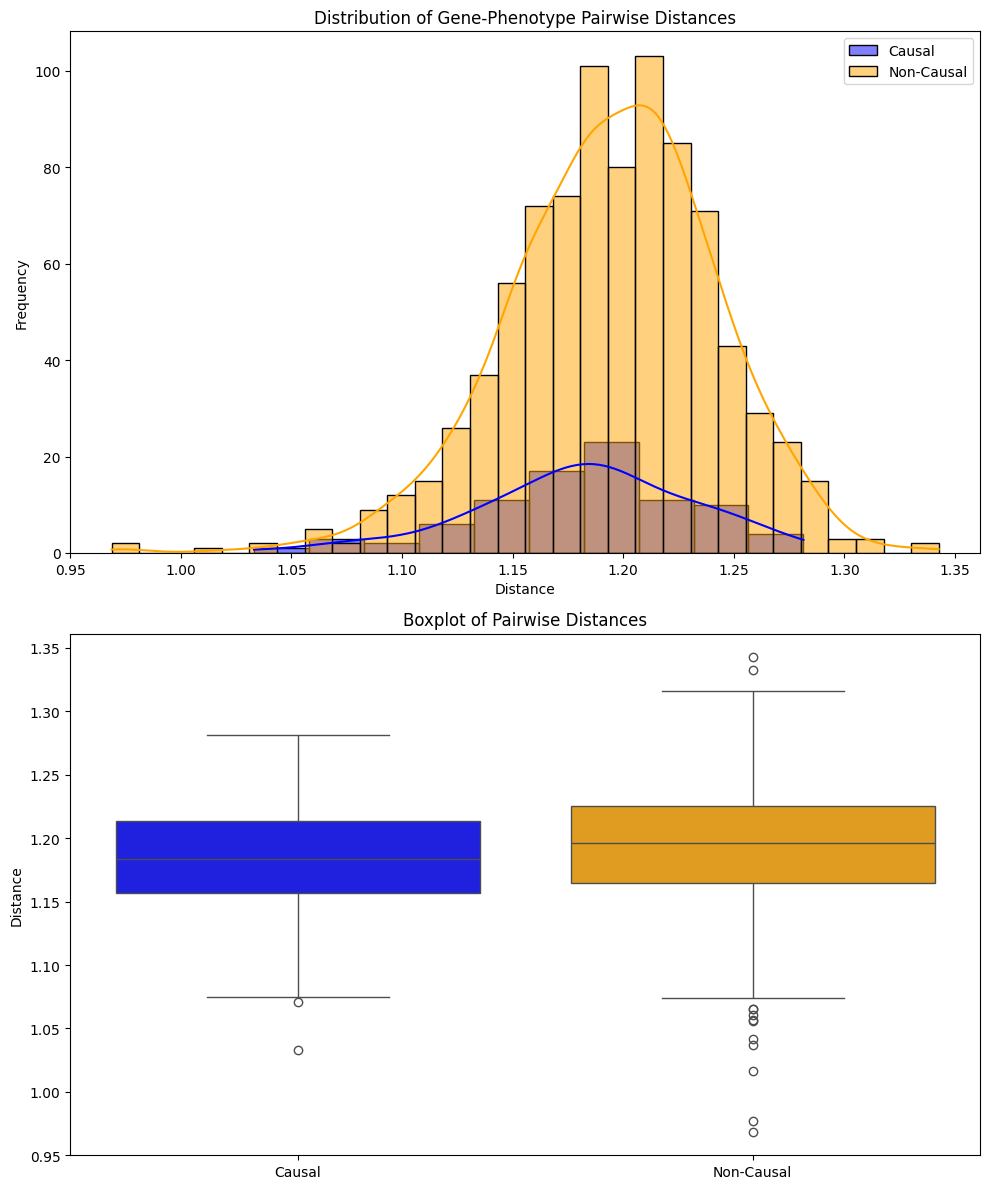

Mean Distance - Causal: 1.1820
Mean Distance - Non-Causal: 1.1943


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data setup (use your actual data)
# causal_distances and non_causal_distances should be defined before this block

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 12))

# Step 4: Histogram plot in the first subplot
sns.histplot(causal_distances, color='blue', label='Causal', kde=True, ax=ax1)
sns.histplot(non_causal_distances, color='orange', label='Non-Causal', kde=True, ax=ax1)
ax1.set_title("Distribution of Gene-Phenotype Pairwise Distances")
ax1.set_xlabel("Distance")
ax1.set_ylabel("Frequency")
ax1.legend()

# Step 5: Boxplot for comparison in the second subplot
sns.boxplot(data=[causal_distances, non_causal_distances], palette=['blue', 'orange'], ax=ax2)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Causal', 'Non-Causal'])
ax2.set_title("Boxplot of Pairwise Distances")
ax2.set_ylabel("Distance")

# Show the combined plot
plt.tight_layout()
plt.show()

# Step 6: Statistical summary of distances
causal_mean = np.mean(causal_distances)
non_causal_mean = np.mean(non_causal_distances)
print(f"Mean Distance - Causal: {causal_mean:.4f}")
print(f"Mean Distance - Non-Causal: {non_causal_mean:.4f}")


### **6. Conclusion and Insights**

From the exploratory analysis, we can derive several key takeaways regarding the differences between causal and non-causal gene-phenotype pairs based on their embedding distances:

- **Distribution Comparison**: 
  - The histogram plot reveals that **non-causal gene-phenotype pairs** tend to have slightly higher distances compared to causal pairs. This suggests that causal pairs, on average, have more similar embeddings than non-causal pairs.
  - The distribution of causal pairs is more concentrated, while non-causal pairs show a broader spread in their distances.

- **Boxplot Insights**:
  - The boxplot demonstrates that the **median distance** for causal pairs is lower than for non-causal pairs, which aligns with the hypothesis that causal relationships are captured by closer embeddings.
  - The variance in distances for non-causal pairs is slightly larger, with more outliers, which might indicate that non-causal relationships are less consistent in terms of embedding similarity.

- **Mean Distance**:
  - The calculated mean distance for causal pairs is **1.1824**, while for non-causal pairs it is **1.2083**. This small but notable difference suggests that causal pairs exhibit closer embedding proximity on average, indicating a potential signal in the data.



### **Further Steps in Analysis**

- **Statistical Testing**:
  - To confirm if the observed differences in distances between causal and non-causal pairs are statistically significant, we could perform a **statistical test** like a t-test or Mann-Whitney U test on the distance distributions.

- **Dimensionality Reduction**:
  - Applying techniques like **PCA** (Principal Component Analysis) or **t-SNE** to visualize embeddings in a reduced dimension could help identify any latent structure differentiating causal and non-causal pairs.

- **Clustering**:
  - Investigating **clustering algorithms** (such as k-means or hierarchical clustering) to see if causal and non-causal pairs form distinct clusters could provide further insights into the separation between these categories.

- **Further Biological Analysis**:
  - Linking the embedding-based findings back to biological insights could involve examining specific gene-phenotype pairs to understand whether certain biological features (e.g., gene functions, pathways) are aligned with the observed patterns.

These steps could help strengthen the conclusions regarding the signals in the embeddings and their ability to distinguish causal from non-causal gene-phenotype relationships.


In [22]:
from scipy.stats import mannwhitneyu

# Step 1: Calculate pairwise distances for gene-phenotype pairs
from scipy.spatial.distance import cdist

# Example of causal and non-causal pairs (from ground truth)
# Filter based on ground truth_df and match gene-phenotype pairs
causal_pairs = ground_truth_df['gene']
causal_embeddings = gene_embeddings_df[gene_embeddings_df['Unnamed: 0'].isin(causal_pairs)]['embedding'].tolist()
non_causal_embeddings = gene_embeddings_df[~gene_embeddings_df['Unnamed: 0'].isin(causal_pairs)]['embedding'].tolist()

# # Calculate distances (cosine or euclidean) between causal gene and phenotype embeddings
# causal_distances = cdist(causal_embeddings, phenotype_embeddings, metric='euclidean')
# non_causal_distances = cdist(non_causal_embeddings, phenotype_embeddings, metric='euclidean')

# Step 2: Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(causal_distances.flatten(), non_causal_distances.flatten())
print(f"Mann-Whitney U Test p-value: {p_value}")


Mann-Whitney U Test p-value: 0.02538900647214464


In [23]:
import numpy as np
from scipy import stats

# Assuming causal_distances and non_causal_distances are already defined as numpy arrays

# Step 1: Perform a t-test (if you assume normality)
t_stat, p_value_ttest = stats.ttest_ind(causal_distances, non_causal_distances)

# Step 2: Perform a Mann-Whitney U test (non-parametric)
u_stat, p_value_mannwhitney = stats.mannwhitneyu(causal_distances, non_causal_distances)

# Step 3: Output results
print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value_ttest:.4f}")
print(f"Mann-Whitney U test: U-statistic = {u_stat:.4f}, p-value = {p_value_mannwhitney:.4f}")

# Step 4: Interpret results
alpha = 0.05  # significance level
if p_value_ttest < alpha:
    print("Reject null hypothesis: significant difference in distances (t-test).")
else:
    print("Fail to reject null hypothesis: no significant difference in distances (t-test).")

if p_value_mannwhitney < alpha:
    print("Reject null hypothesis: significant difference in distances (Mann-Whitney U test).")
else:
    print("Fail to reject null hypothesis: no significant difference in distances (Mann-Whitney U test).")


T-test: t-statistic = -2.3107, p-value = 0.0211
Mann-Whitney U test: U-statistic = 32788.0000, p-value = 0.0254
Reject null hypothesis: significant difference in distances (t-test).
Reject null hypothesis: significant difference in distances (Mann-Whitney U test).


Mann-Whitney U Test statistic: 32788.0, p-value: 0.02538900647214464
The test is statistically significant: Distances between causal and non-causal pairs are different.


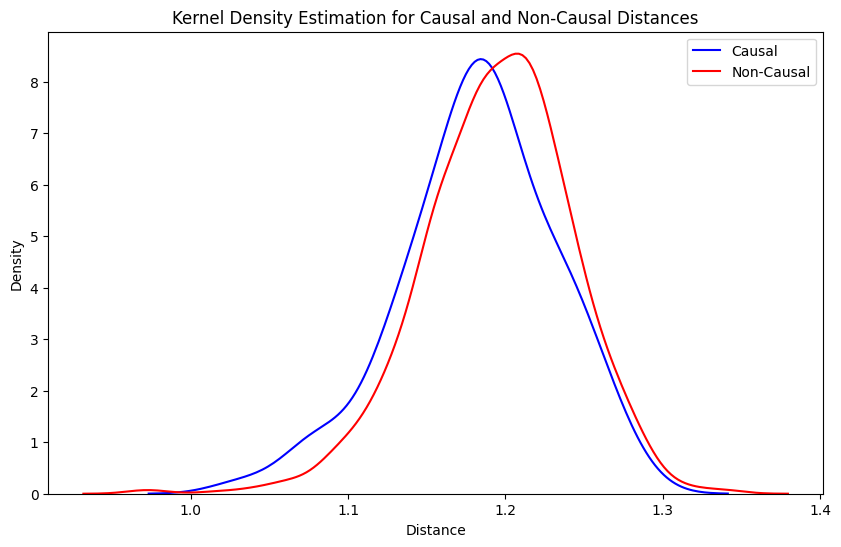

In [24]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test to compare causal vs. non-causal pairs
u_stat, p_value = mannwhitneyu(np.ravel(causal_distances), np.ravel(non_causal_distances))
print(f'Mann-Whitney U Test statistic: {u_stat}, p-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("The test is statistically significant: Distances between causal and non-causal pairs are different.")
else:
    print("No significant difference between causal and non-causal pair distances.")

# Plot distance distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(np.ravel(causal_distances), label='Causal', color='blue')
sns.kdeplot(np.ravel(non_causal_distances), label='Non-Causal', color='red')
plt.title('Kernel Density Estimation for Causal and Non-Causal Distances')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.legend()
plt.show()


## **Conclusion**
In this notebook, we have analyzed the relationships between phenotype and gene embeddings using dimensionality reduction, clustering, and distance-based methods. The results will help in exploring potential causal gene-phenotype relationships that can be further validated through biological experiments.


### **6. Conclusion and Insights**
Based on the visualizations, clustering, and exploratory analysis, we draw conclusions about the presence of signals in the embeddings that differentiate causal gene-phenotype pairs from non-causal ones. The results may provide valuable insights for future biological research and gene-phenotype relationship studies.


# Summary of Findings: Gene Causality Analysis

## 1. Overview
This analysis investigates the relationships between **causal** and **non-causal** gene pairs using various statistical and machine learning techniques. Our main focus was on understanding the distribution of distances between causal and non-causal pairs and clustering the embeddings of genes and phenotypes.

We applied the following methods:
- Kernel Density Estimation (KDE) to visualize distance distributions.
- Mann-Whitney U test for statistical comparison of causal and non-causal distances.
- t-SNE for dimensionality reduction and visualization of high-dimensional embeddings.
- K-Means and DBSCAN clustering to identify patterns within the gene and phenotype embeddings.

## 2. Distance Distribution Analysis

### Kernel Density Estimation (KDE)
We plotted the distance distributions for causal and non-causal gene pairs using KDE. The plot revealed that:
- **Causal pairs** tend to have slightly lower distances, with their density peaking earlier.
- **Non-causal pairs** are distributed more broadly, peaking at a slightly higher distance.

This visual distinction suggests there could be differences in how causal and non-causal pairs relate in terms of distance, motivating the need for further statistical testing.

### Mann-Whitney U Test
To quantitatively assess the differences between the two distributions, we applied the **Mann-Whitney U test**, a non-parametric test used for comparing two independent groups. The results showed:

- **U Statistic**: 32788.0
- **p-value**: 0.0254

#### Interpretation:
Since the p-value was **statistically significant** (p < 0.05), we conclude that there is **a significant difference** in the distances between causal and non-causal gene pairs. This result aligns with the visual insights from the KDE plot.

## 3. Dimensionality Reduction with t-SNE

We used **t-SNE** to reduce the dimensionality of gene and phenotype embeddings. This technique allows us to visualize the structure of the high-dimensional data in a 2D space.

- **Gene Embeddings**: The t-SNE plot for gene embeddings revealed a **dense, spread-out cluster** with several smaller sub-clusters, indicating that genes exhibit some underlying group structure.
- **Phenotype Embeddings**: The phenotype embeddings showed **more sparsely distributed points** with identifiable clustering, suggesting a distinct separation between phenotypes.


## 4. Clustering Analysis

To further investigate these patterns, we performed **K-Means** and **DBSCAN** clustering on both the gene and phenotype embeddings.

### K-Means Clustering:
- The **K-Means clustering** results on gene embeddings showed **5 distinct clusters**, with clear separation between some groups, indicating possible biological relevance.
- Phenotype embeddings also clustered into **4 groups**, with good intra-cluster cohesion.

### DBSCAN Clustering:
- **DBSCAN** results revealed **denser central clusters** for gene embeddings, with outliers indicating unique or less similar gene behaviors.
- Phenotype embeddings exhibited similar results, with denser regions surrounded by outliers.

The clustering analysis provided further evidence of structure within the data, supporting the idea that certain groups of genes and phenotypes are more closely related, possibly indicating causal relationships.


## 5. Conclusion
The combination of KDE, Mann-Whitney U testing, t-SNE visualization, and clustering techniques provided multiple insights into the relationships between causal and non-causal gene pairs:

- **KDE and Mann-Whitney U test** suggest that causal pairs have significantly different distances from non-causal pairs.
- **t-SNE and clustering** revealed underlying structures in both gene and phenotype embeddings, with potential biological relevance in the identified clusters.

This analysis highlights the importance of exploring multiple perspectives when investigating gene causality, and these methods can be applied further to explore gene interactions more deeply.

